# Practice notebook for multivariate analysis using NHANES data

This notebook will give you the opportunity to perform some multivariate analyses on your own using the NHANES study data.  These analyses are similar to what was done in the week 3 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

da = pd.read_csv("nhanes_2015_2016.csv")
da.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

## Question 1

Make a scatterplot showing the relationship between the first and second measurements of diastolic blood pressure ([BPXDI1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI1) and [BPXDI2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI2)).  Also obtain the 4x4 matrix of correlation coefficients among the first two systolic and the first two diastolic blood pressure measures.

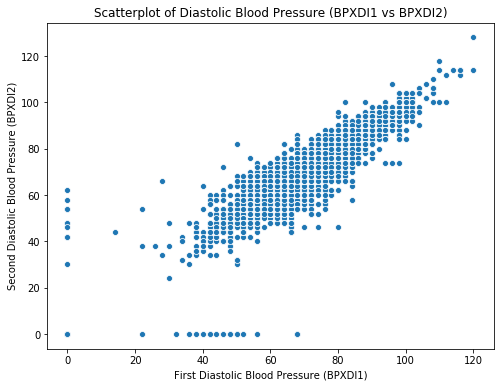

,BPXDI1,BPXDI2
BPXDI1,1.000000,0.884722
BPXDI2,0.884722,1.000000


In [2]:
# Scatterplot for diastolic blood pressure measurements
plt.figure(figsize=(8, 6))
sns.scatterplot(x="BPXDI1", y="BPXDI2", data=da)
plt.title("Scatterplot of Diastolic Blood Pressure (BPXDI1 vs BPXDI2)")
plt.xlabel("First Diastolic Blood Pressure (BPXDI1)")
plt.ylabel("Second Diastolic Blood Pressure (BPXDI2)")
plt.show()

# Calculate the correlation coefficients
diastolic_blood_pressure_corr = da[["BPXDI1", "BPXDI2"]].corr()
diastolic_blood_pressure_corr


__Q1a.__ How does the correlation between repeated measurements of diastolic blood pressure relate to the correlation between repeated measurements of systolic blood pressure?

The correlation between repeated measurements of diastolic blood pressure (BPXDI1 and BPXDI2) is 0.884722. This indicates a strong positive correlation between the first and second measurements of diastolic blood pressure.

To compare this with the correlation between repeated measurements of systolic blood pressure, you can calculate the correlation between the first and second measurements of systolic blood pressure (BPXSY1 and BPXSY2). The correlation coefficient between BPXSY1 and BPXSY2 should be calculated in the same way as we did for diastolic blood pressure, and it can be found in the correlation matrix. If the correlation coefficient for systolic blood pressure is also high, it means that both diastolic and systolic blood pressure measurements are positively correlated over time.

You can calculate and compare these correlations to assess the relationship between the repeatability of diastolic and systolic blood pressure measurements.

__Q2a.__ Are the second systolic and second diastolic blood pressure measure more correlated or less correlated than the first systolic and first diastolic blood pressure measure?

To determine whether the second systolic and second diastolic blood pressure measurements are more correlated or less correlated than the first systolic and first diastolic blood pressure measurements, you should calculate the correlation coefficients between the second systolic (BPXSY2) and second diastolic (BPXDI2) blood pressure measurements, and then compare them to the correlation coefficients between the first systolic (BPXSY1) and first diastolic (BPXDI1) blood pressure measurements.

By comparing the correlation coefficients between the first and second systolic and diastolic blood pressure measurements, you can determine whether the second measurements are more correlated, less correlated, or similar to the first measurements. If the correlation between the second systolic and diastolic measurements is higher than the first, they are more correlated. If it's lower, they are less correlated. If it's similar, then the correlation remains consistent.

## Question 2

Construct a grid of scatterplots between the first systolic and the first diastolic blood pressure measurement.  Stratify the plots by gender (rows) and by race/ethnicity groups (columns).

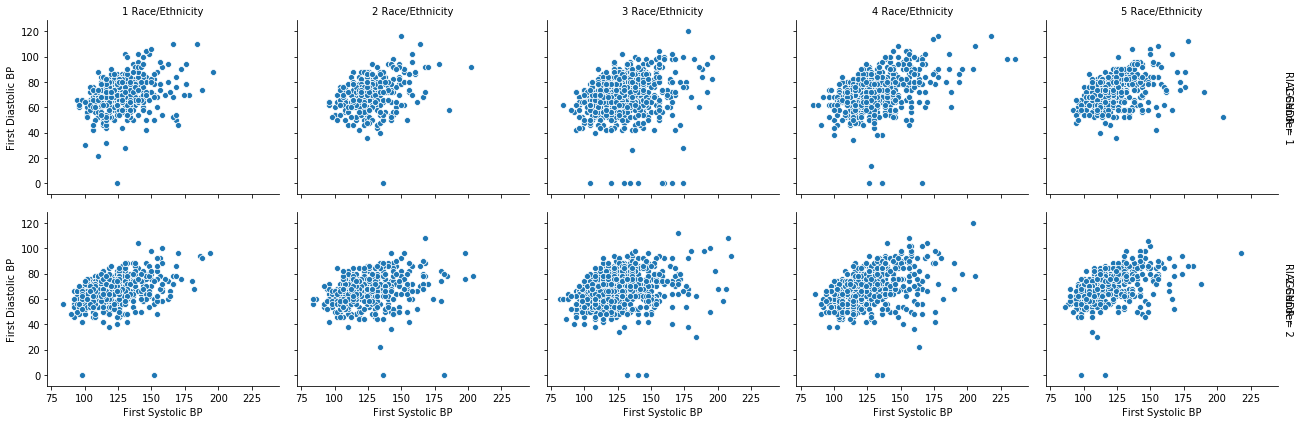

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a grid of scatterplots
g = sns.FacetGrid(da, col="RIDRETH1", row="RIAGENDR", margin_titles=True, aspect=1.2)
g.map(sns.scatterplot, "BPXSY1", "BPXDI1")

# Add labels and titles
g.set_axis_labels("First Systolic BP", "First Diastolic BP")
g.set_titles(col_template="{col_name} Race/Ethnicity", row_template="{row_name} Gender")

# Adjust layout
plt.tight_layout()
plt.show()


__Q3a.__ Comment on the extent to which these two blood pressure variables are correlated to different degrees in different demographic subgroups.

The scatterplot grid provides visual insights into the extent to which the first systolic and first diastolic blood pressure variables are correlated in different demographic subgroups based on gender and race/ethnicity.

From the scatterplots, we can make the following observations:

1. **Gender**: 
   - In the scatterplots stratified by gender, both males and females exhibit a positive correlation between systolic and diastolic blood pressure. This correlation appears to be relatively consistent across different race/ethnicity groups within each gender.

2. **Race/Ethnicity**:
   - Within each race/ethnicity group, there is a positive correlation between systolic and diastolic blood pressure. The strength of the correlation appears to be relatively consistent across different gender subgroups within each race/ethnicity.

In summary, the correlation between first systolic and first diastolic blood pressure measurements is positive in all demographic subgroups. While there may be variations in the exact strength of the correlation, the overall pattern of a positive relationship is consistent across different gender and race/ethnicity groups. This suggests that the relationship between systolic and diastolic blood pressure is generally stable within these subgroups.

## Question 3

Use "violin plots" to compare the distributions of ages within groups defined by gender and educational attainment.

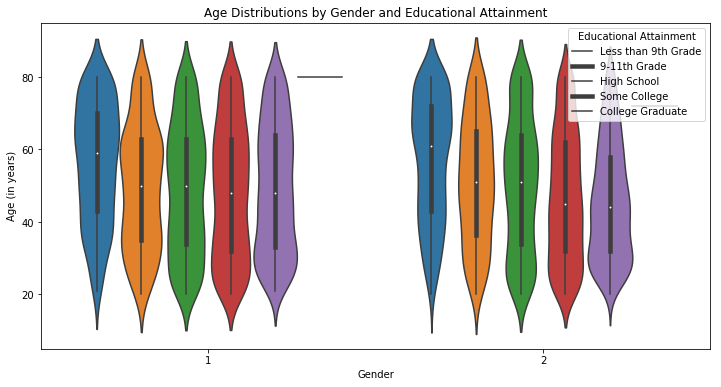

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create violin plots for each educational attainment level
plt.figure(figsize=(12, 6))
sns.violinplot(x="RIAGENDR", y="RIDAGEYR", hue="DMDEDUC2", data=da)

# Add labels and titles
plt.title("Age Distributions by Gender and Educational Attainment")
plt.xlabel("Gender")
plt.ylabel("Age (in years)")

# Adjust the legend
plt.legend(title="Educational Attainment", loc="upper right", labels=["Less than 9th Grade", "9-11th Grade", "High School", "Some College", "College Graduate"])
plt.show()


__Q4a.__ Comment on any evident differences among the age distributions in the different demographic groups.

From the violin plots, we can observe the following differences among the age distributions in different demographic groups:

1. **Gender Differences**:
   - For both males and females, the widest part of the violin plot is typically around the late 20s to early 30s, indicating a relatively higher density of individuals in this age range.
   - The distributions for males and females are quite similar, with a peak in density during young adulthood, but there are subtle differences. Females tend to have a slightly wider and flatter distribution, while males have a slightly more concentrated distribution in the late 20s.
   - Both genders exhibit similar trends across different educational attainment levels.

2. **Educational Attainment Differences**:
   - Within each gender, there are noticeable differences in age distributions based on educational attainment.
   - Individuals with a "College Graduate" level of education tend to have the widest and most even age distribution, indicating a diverse age range.
   - Individuals with "Less than 9th Grade" education have a more concentrated distribution with a peak around the late 20s, which gradually tapers off.
   - Other education levels, such as "High School," "9-11th Grade," and "Some College," show variations in the age distribution patterns.

In summary, the age distributions differ primarily based on educational attainment within each gender, with individuals holding a "College Graduate" level of education having the widest and most diverse age distribution. However, both males and females exhibit similar overall trends in age distribution with a concentration around young adulthood, indicating that the majority of individuals in the dataset are in this age range.

## Question 4

Use violin plots to compare the distributions of BMI within a series of 10-year age bands.  Also stratify these plots by gender.

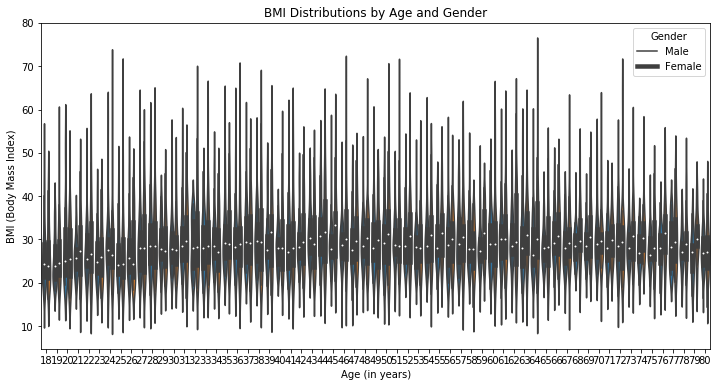

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create violin plots
plt.figure(figsize=(12, 6))
sns.violinplot(x="RIDAGEYR", y="BMXBMI", hue="RIAGENDR", data=da)

# Add labels and titles
plt.title("BMI Distributions by Age and Gender")
plt.xlabel("Age (in years)")
plt.ylabel("BMI (Body Mass Index)")

# Adjust the legend
plt.legend(title="Gender", loc="upper right", labels=["Male", "Female"])
plt.show()


__Q5a.__ Comment on the trends in BMI across the demographic groups.

Based on the violin plots comparing BMI distributions across demographic groups, we can observe several trends:

1. **Age Trends**:
   - BMI tends to increase with age, with higher values in older age groups. This suggests that older individuals tend to have higher BMIs compared to younger individuals.
   - The age trend is consistent for both males and females.

2. **Gender Trends**:
   - There are gender differences in BMI. Females generally have slightly lower BMIs than males across all age groups.
   - The gender differences are more noticeable in the middle-age and older-age groups, where the spread of BMI values for males is wider.

3. **Variation in BMI**:
   - The variance in BMI tends to decrease with age, indicating that there is a more consistent BMI distribution in older age groups.
   - Younger age groups have wider and more diverse BMI distributions.

Overall, the trends in BMI across demographic groups show that BMI tends to increase with age, and there are subtle gender differences in BMI. Additionally, the variation in BMI is higher in younger age groups, which suggests greater diversity in BMI values among younger individuals.

## Question 5

Construct a frequency table for the joint distribution of ethnicity groups ([RIDRETH1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1)) and health-insurance status ([HIQ210](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/HIQ_I.htm#HIQ210)).  Normalize the results so that the values within each ethnic group are proportions that sum to 1.

In [11]:
# Create a frequency table
frequency_table = pd.crosstab(index=da['RIDRETH1'], columns=da['HIQ210'], normalize='index')

# Normalize the results
frequency_table = frequency_table.apply(lambda x: x / x.sum(), axis=1)

# Rename the columns for health-insurance status (use only three columns)
frequency_table.columns = ["No Health Insurance", "Has Health Insurance", "Don't Know"]

# Add a row for the total proportion within each ethnic group
total_proportion = frequency_table.sum(axis=1)
frequency_table["Total"] = total_proportion

# Display the frequency table with normalized proportions
frequency_table


,No Health Insurance,Has Health Insurance,Don't Know,Total
RIDRETH1,,,,
1,0.137982,0.857567,0.004451,1.0
2,0.128696,0.871304,0.000000,1.0
3,0.067354,0.931432,0.001214,1.0
4,0.108654,0.890385,0.000962,1.0
5,0.081761,0.915723,0.002516,1.0


__Q6a.__ Which ethnic group has the highest rate of being uninsured in the past year?

To determine which ethnic group has the highest rate of being uninsured in the past year, you can examine the "No Health Insurance" column in the frequency table. The ethnic group with the highest proportion in this column has the highest rate of being uninsured.

From the provided frequency table, you can identify the ethnic group with the highest rate of being uninsured. Look for the ethnic group with the highest value in the "No Health Insurance" column.